In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()
os.chdir("/Users/ellawileman/Desktop/fall 2024/stats programming/datasets")

In [2]:
dat = pd.read_csv("liverdisease.csv")
dat

,Age,Sex,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Cirrhosis
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,2,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,2,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,2,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,2,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
dat["Cirrhosis"].value_counts()
416/(416+167)

0.7135506003430532

Text(0.5, 1.0, 'Cirrhosis Diagnosis in Sample')

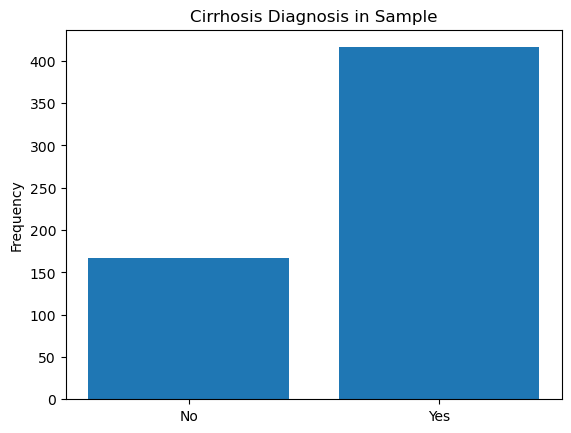

In [4]:
# Exploratory data analysis 
vals = dat["Cirrhosis"].value_counts()
plt.bar(vals.index, vals)
# Customize the x-axis labels
plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0 and 1 with "No" and "Yes"
plt.ylabel("Frequency")
plt.title("Cirrhosis Diagnosis in Sample")

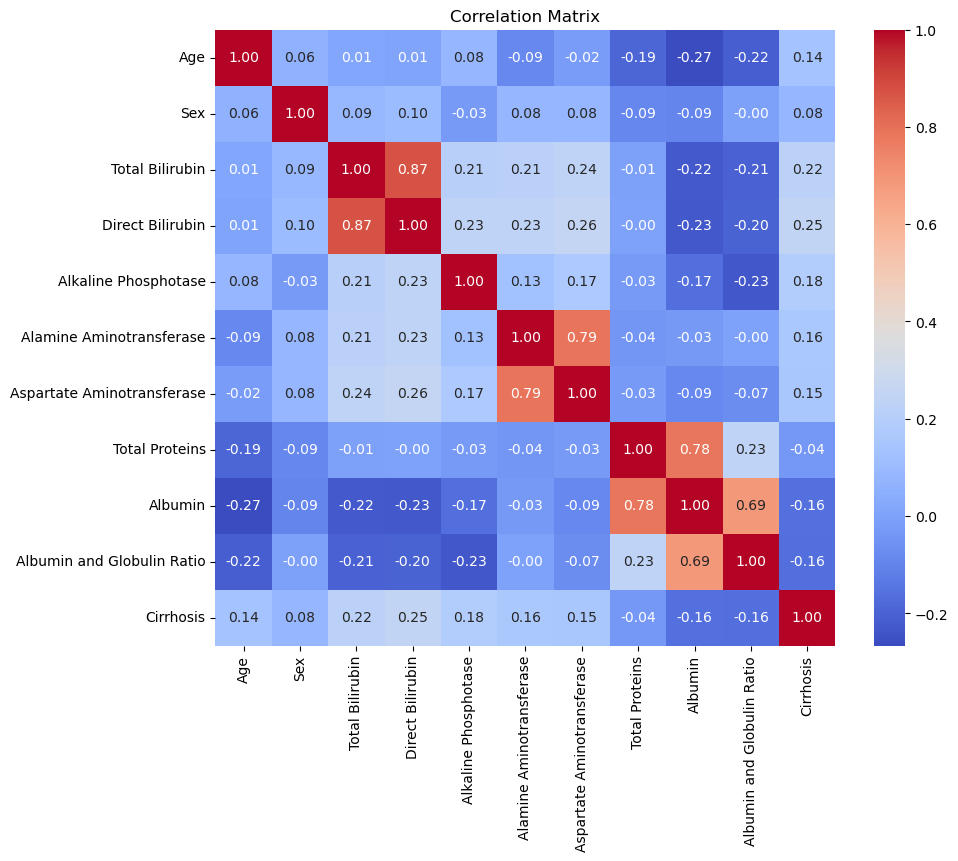

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
corr_matrix = dat.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
X = dat["Direct Bilirubin"].values.reshape(-1, 1)
min(X)

array([0.1])

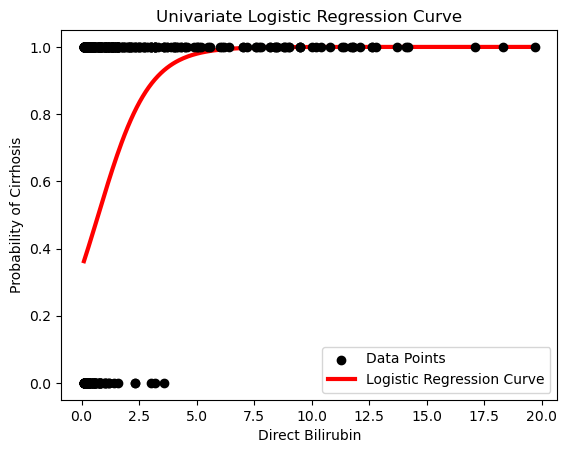

In [7]:
# first iteration of logistic model, using only one predictor 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Use a single predictor
X = dat["Direct Bilirubin"].values.reshape(-1, 1)  # Reshape to 2D
y = dat["Cirrhosis"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Instantiate the model
logreg = LogisticRegression(random_state=16, max_iter=500, class_weight='balanced', solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

# Generate a range of values for a smooth curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predict probabilities for the range
probabilities = logreg.predict_proba(X_range)[:, 1]

# Plot the data points
plt.scatter(X, y, color='black', zorder=20, label="Data Points")

# Plot the logistic regression curve
plt.plot(X_range, probabilities, color='red', linewidth=3, label="Logistic Regression Curve")

# Customize the plot
plt.xlabel('Direct Bilirubin')
plt.ylabel('Probability of Cirrhosis')
plt.title('Univariate Logistic Regression Curve')
plt.legend()
plt.show()


In [9]:
X = dat.iloc[:, 0:10] 
y = dat["Cirrhosis"]

In [10]:

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the data
dat = pd.read_csv("liverdisease.csv")

# Handle missing values
dat.fillna(dat.median(), inplace=True)

# Separate features and target
X = dat.iloc[:, 0:10] 
y = dat["Cirrhosis"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=16)

# Instantiate the model with adjustments
logreg = LogisticRegression(random_state=16, max_iter=500, class_weight='balanced', solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)




In [39]:
column_names = dat.columns[0:10]
column_names
len(column_names)

10

In [37]:
len(coefficients)


10

In [42]:
display(X)

,Age,Sex,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,2,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,2,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,2,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,2,1.3,0.5,184,29,32,6.8,3.4,1.00


In [43]:

import numpy as np
from sklearn.linear_model import LogisticRegression

# Extract parameters and calculate odds ratios
coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame
results_df = pd.DataFrame({
    'Predictor': list(column_names),
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).reset_index(drop=True)

display(results_df)

,Predictor,Coefficient,Odds Ratio
0,Age,0.315040,1.370314
1,Sex,0.069271,1.071727
2,Total Bilirubin,0.367436,1.444027
3,Direct Bilirubin,0.847152,2.332994
4,Alkaline Phosphotase,0.139801,1.150044
5,Alamine Aminotransferase,1.479540,4.390925
6,Aspartate Aminotransferase,1.110662,3.036369
7,Total Proteins,0.385730,1.470688
8,Albumin,-0.537222,0.584369
9,Albumin and Globulin Ratio,0.061626,1.063565


In [17]:
from sklearn.metrics import classification_report
target_names = ['without cirrhosis', 'with cirrhosis']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

without cirrhosis       0.43      0.85      0.57        46
   with cirrhosis       0.87      0.48      0.62       100

         accuracy                           0.60       146
        macro avg       0.65      0.66      0.59       146
     weighted avg       0.73      0.60      0.60       146



In [12]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = logreg.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[39  7]
 [52 48]]


Confusion Matrix:
[[39  7]
 [52 48]]


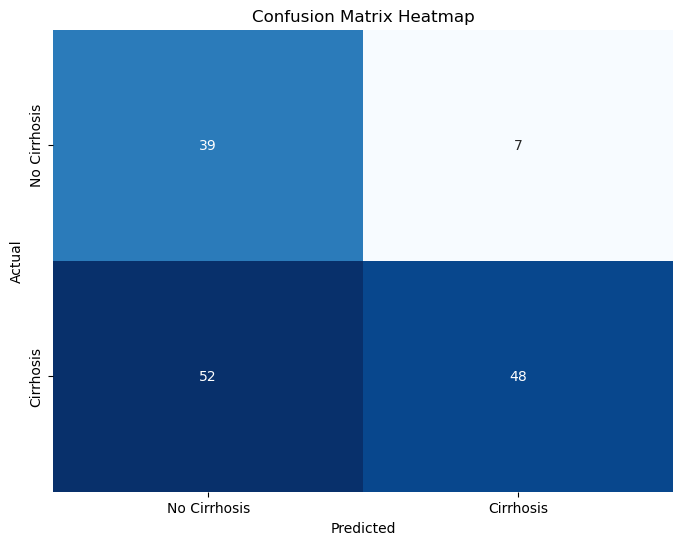

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = logreg.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cirrhosis', 'Cirrhosis'], yticklabels=['No Cirrhosis', 'Cirrhosis'], cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
from sklearn.metrics import classification_report
target_names = ['without cirrhosis', 'with cirrhosis']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

without cirrhosis       0.43      0.85      0.57        46
   with cirrhosis       0.87      0.48      0.62       100

         accuracy                           0.60       146
        macro avg       0.65      0.66      0.59       146
     weighted avg       0.73      0.60      0.60       146



In [15]:
# Output display for user

# display prediction
# Accuracy 

In [16]:
# 

Instructions: Input lab results and demographic information below. 

Disclaimer: the logistic regression model has a 60% accuracy and the selected neural network has a 75% accuracy. These results are not intended to be used in replacement of consulting a doctor.

Based a positive classification from both the neural network and logistic regression, it is likely that you are at risk for cirrhosis.

Based on conflicting results from the neural network and logistic regression, it is inconclusive whether you are at risk for cirrhosis. 

Based on a negative classification from both the neural network and logistic regression, it is unlikely that you are at risk for cirrhosis.

These distributions show where your levels are, compared to the population: 

In [ ]:
# Logic to choose which histograms to display based on how unlikely the values user input are:

from scipy import stats


z_scores = dict()
# user inputs list not including the gender and age variables
user_input = [1,1000,4,6,6,1]

counter = 0

subset = dat.iloc[:, [3, 4, 5, 6, 7, 9]] 
# Iterate through columns
for column in subset.columns:
    col_data = dat[column]
    col_list = dat[column].tolist()  # Convert column to list
    z_score = (user_input[counter] - np.mean(col_data)) / np.std(col_data)
    z_scores[column] = z_score
    counter = counter + 1

#z_scores = sorted(z_scores, key=abs)
print(z_scores )
sorted_columns = sorted(z_scores, key=lambda x: abs(z_scores[x]), reverse=True)
top_two_columns = sorted_columns[:2]
print(top_two_columns)

In [ ]:
top_two_columns[0]
subset.columns.get_loc(top_two_columns[0])

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

axes[0].hist(dat[top_two_columns[0]], bins=30, color='grey', alpha=0.7)
# Store the variable from user input to replace the 3 in the line below with
index_of_ui = subset.columns.get_loc(top_two_columns[0])
axes[0].axvline(user_input[index_of_ui], color='red', linestyle='dashed', linewidth=2, label="Your Levels")
axes[0].legend(loc='upper right')
axes[0].set_title(f"{top_two_columns[0]} Levels in the Population")
#axes[0].set_xlabel("Grams/deciliter")
axes[0].set_ylabel("Frequency")

axes[1].hist(dat[top_two_columns[1]], bins=30, color='grey', alpha=0.7)
index_of_ui = subset.columns.get_loc(top_two_columns[1])
axes[1].axvline(user_input[index_of_ui], color='red', linestyle='dashed', linewidth=2, label="Your Levels")
axes[1].legend(loc='upper right')
axes[1].set_title(f"{top_two_columns[1]} Levels in the Population")
#axes[1].set_xlabel("Milligrams/deciliter")
axes[1].set_ylabel("Frequency")

In [ ]:
import matplotlib.pyplot as plt

user_input = [1,1000,4,6,6,1]

counter = 0

subset = dat.iloc[:, [3, 4, 5, 6, 7, 9]] 


# Assuming `subset` is a DataFrame
counter = 0
num_columns = 3  # Number of columns in subplot grid

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through the columns in the subset DataFrame
for column in subset.columns:
    # Determine row and column index in the axes grid
    ax = axes[counter // num_columns, counter % num_columns]  # Access the correct subplot axis
    
    # Plot histogram on the selected axis
    ax.hist(subset[column], bins=30, color='grey', alpha=0.7)
    ax.axvline(user_input[counter], color='red', linestyle='dashed', linewidth=2, label="Your Levels")
    ax.set_title(f'Histogram of {column}')  # Add title to the subplot
    ax.legend(loc='upper right')
    counter += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
subset.columns[0]